In [2]:
#算法实现

import numpy as np

def lms(X, W, b):
    X = np.array(X)
    return np.sum(X * W) + b

In [3]:
# 数据可视化

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import itertools

num_train = 1000
num_test = 100

#制作数据集
data = make_regression(n_samples = num_train, n_features = 2)

#可视化数据集
plt.figure(figsize = [12, 4], dpi = 100)
plt.subplot(1, 2, 1)
plt.scatter(data[0][:, 0], data[0][:, 1], 1)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.subplot(1, 2, 2)
x = PCA(n_components = 1).fit_transform(data[0])
plt.scatter(x, data[1], 1)
plt.xlabel('x')
plt.ylabel('y')


print(data[1].shape)
#将数据集分割为训练集和测试集，并转成可迭代对象
train_x, test_x, train_y, test_y = [itertools.cycle(i) for i in train_test_split(data[0], data[1], test_size=num_test)] 

(1000,)


Text(0, 0.5, 'losses')

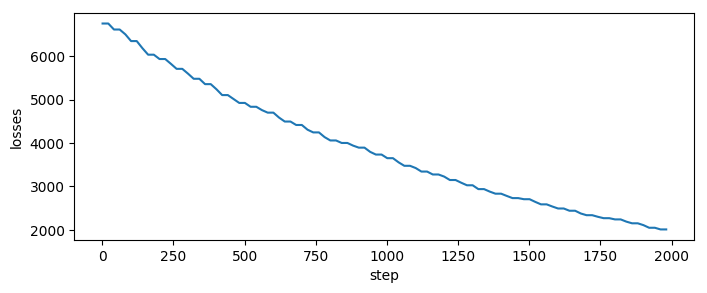

In [5]:
#训练数据

from sklearn.metrics import mean_squared_error as mse

train_steps = 2000
lr = 0.01
summary_step = 20
summary = []

#初始化连接权重和偏置量
W = np.random.randn(2)
b = 0
tmp_W = 0
tmp_b = 0

for i in range(train_steps):
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = lms(X, W, b)
            tmp.append(np.array([label, out]))
        tmp = np.array(tmp)
        #计算均方误差代价
        loss = mse(tmp[:, 0], tmp[:, 1])
        summary.append(np.array([i + 1, loss]))
    # 获得一个样本，并输入模型得到模型输出结果
    X = next(train_x)
    label = next(train_y)
    out = lms(X, W, b)
    
    # 计算偏导数
    dW = -X * (label - out)
    db = -1 * (label - out)
    
    tmp_W = tmp_W + dW
    tmp_b = tmp_b + db
    
    #更新模型参数
    if i % 32 == 31:
        W = W - lr * (tmp_W / 32)
        b = b - lr * (tmp_b / 32)
        tmp_W = 0
        tmp_b = 0

# 可视化摘要
summary = np.array(summary)    
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(summary[:, 0], summary[:, 1])
plt.xlabel('step')
plt.ylabel('losses')
        